# Titanic Survival Data Analysis

### Introduction:

At 2:20 a.m. on April 15, 1912, the “unsinkable” R.M.S. Titanic disappeared beneath the waves, taking with her 1,500 souls. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.



### Questions:

In this assignment, we will examine if there are correlations between class, age, sex, embarked port, number of siblings/spouses and number of children/parents with survivability. We will also investigate what are the two variables that have strongest correlations with survivability and how are the directions.
Note: I use Python 3 code in this assignment.


## Data Wrangling 

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
titanic_df1 = pd.read_csv('titanic-data.csv')

In [8]:
titanic_df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
print(titanic_df1.count())
print(titanic_df1['Age'].min())
print(titanic_df1['Age'].max())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
0.42
80.0


### Note:

From the count above one can see that columns "Age" and "Cabin" have missing values. We will handle missing data for "Age", while there are too many missing data for "Cabin" and it may not explain much in analysis of Titanic's survivability.

### Cleaning Data

There are 177 missing data in "Age" columns indicated by NaN. Since we can suspect that "Age" is an important predictor for survivability of Titanic passengers, we can not drop it. Instead we will replace the missing value with mean or median. Replacing missing value with mean will keep mean intact, but may change the median, and vice versa. In this case, using median makes more sense since from statistical description we can see the Age max value is an outlier. Since outlier values pull the mean, we should use median instead.
Rather than modifying the original dataframe, new dataframe is created to store updated values. We will also drop "Cabin" feature.
Feature "Embarked" is also missing 2 values. We will replace them with "U" as short of Unknown.

Not used columns: Ticket Fare = Class, Passenger Name

In [189]:
titanic_df2 = titanic_df1
titanic_df2['Age'] = titanic_df2['Age'].fillna(titanic_df2['Age'].median())
titanic_df2['Embarked'] = titanic_df2['Embarked'].fillna('U')
titanic_df2 = titanic_df2.drop('Cabin',1)

titanic_df2.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

Now we have all data complete

### Convert Sex and Embarked to Numeric

In [190]:
gender = {"male":0 ,"female" :1}
embarkedport = {"C":0,"Q":1,"S":2,"U":3}
titanic_df2['Sex'] = titanic_df2['Sex'].apply(gender.get)
titanic_df2['Embarked'] = titanic_df2['Embarked'].apply(embarkedport.get)


In [191]:
titanic_df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


### Grouping Age

In [192]:
def convert_age(age):
    if age >= 0 and age < 5:
        return 0
    elif age >=5 and age < 15:
        return 1
    elif age >=15 and age < 20:
        return 2
    elif age >=20 and age < 35:
        return 3
    elif age >=35 and age < 50:
        return 4
    elif age >=50 and age < 65:
        return 5    
    else:
        return 6

In [193]:
titanic_df2['Age']=titanic_df2['Age'].apply(convert_age)

In [194]:
titanic_df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,4,0,0,373450,8.0500,2


## Exploratory Data Analysis 

First we need to find which variables have the highest correlations with the passengers survivability. We can use Pearson correlation coefficient. It is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

In [504]:
def calculate_pearson(x,y):
    return corrcoef(x,y,ddof=0)[0,1]

In [505]:
pearson_array = pd.DataFrame({
    'Index': ['Pclass - Survived', 'Sex - Survived', 'Embarked - Survived','Age - Survived','SibSp - Survived','Parch - Survived'],
    'Pearson Coefficient': [calculate_pearson(titanic_df2['Pclass'],titanic_df2['Survived']), 
                calculate_pearson(titanic_df2['Sex'],titanic_df2['Survived']), 
                calculate_pearson(titanic_df2['Embarked'],titanic_df2['Survived']),
                calculate_pearson(titanic_df2['Age'],titanic_df2['Survived']),
                calculate_pearson(titanic_df2['SibSp'],titanic_df2['Survived']),
                calculate_pearson(titanic_df2['Parch'],titanic_df2['Survived'])]
})
pearson_array

,Index,Pearson Coefficient
0,Pclass - Survived,-0.338481
1,Sex - Survived,0.543351
2,Embarked - Survived,-0.163517
3,Age - Survived,-0.090186
4,SibSp - Survived,-0.035322
5,Parch - Survived,0.081629


We can see that the two strongest dependent variables are Sex and Pclass. In our data, male=0 and female=1 under variable Sex. Since the Pearson coeffcient of variable Sex is 0.543, we can say that female passengers are more likely to survived. On the other hand, Pclass variable represents the ticket class: 1 = 1st class, 2 = 2nd class, and 3 = 3rd class. The Pearson coefficient for Pclass is -0.338. This means that the 1st class passengers are more likely to survive.

We will analyze these two variables further through the visualization.

### Plot Function

In [511]:
def survived_percentage(df,cat1):
    survived_df = df.groupby([cat1,'Survived'],as_index=False).count()
    survived_df['Percentage'] = survived_df['PassengerId']/df['PassengerId'].count()*100
    fig = plt.figure(figsize=(8, 4))
    plt.scatter(survived_df[cat1],survived_df['Survived'], s=survived_df['Percentage']*100,c='b')
    plt.xlabel(cat1)
    plt.ylabel('Survived')
    plt.title('Bubble Diagram of Passengers Survivability and '+ cat1)
    print(survived_df[['Survived',cat1,'PassengerId','Percentage']])
    

In [ ]:
def delcol(df,col):
    del df[col]

def calldelcol(df,listcol):
    for col in listcol:
        delcol(df,col)
    df



### 1. Class vs Survived

Variable Pclass represents the ticket class. 

Pclass:
- 1 = 1st class 
- 2 = 2nd class
- 3 = 3rd class.

Survived:
- 0 = not survived 
- 1 = survived. 

In [607]:
groupedclass=titanic_df2.groupby(['Pclass','Survived']).count()
listcol=['PassengerId','Sex','Age','SibSp','Parch','Fare','Embarked','Ticket']
calldelcol(groupedclass,listcol)
nonsurvived = groupedclass.xs(0,level='Survived')
nonsurvived.columns=['NotSurvived']
survived = groupedclass.xs(1,level='Survived')
survived.columns=['Survived']

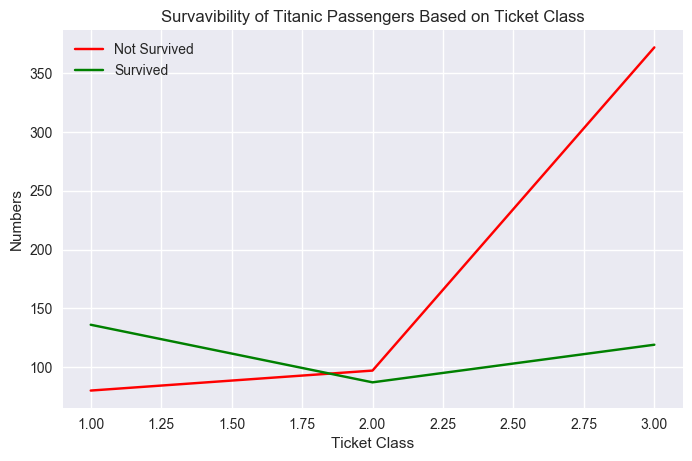

In [608]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=100)

axes.plot(nonsurvived, c='red',label = "Not Survived")
axes.plot(survived, c='green',label = "Survived")
axes.set_xlabel('Ticket Class')
axes.set_ylabel('Numbers')
axes.set_title('Survavibility of Titanic Passengers Based on Ticket Class')
axes.legend(loc=0)


plt.show()

The line chart above shows that for passengers in first class, they had higher survavibility rate. However, the opposite applies for the passengers in second and especially the third class where the unsurvived passengers were about three times more than the survived ones.

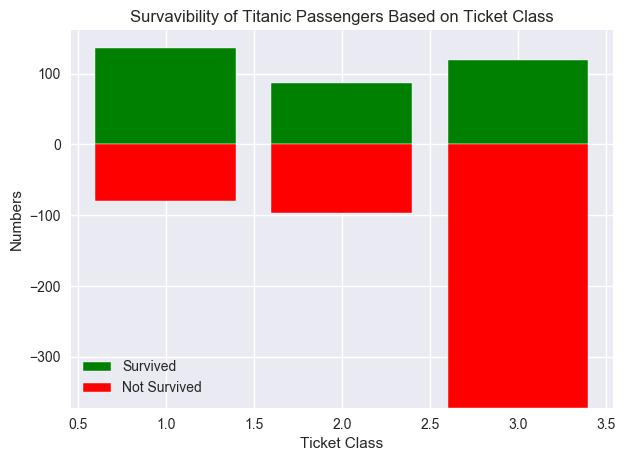

In [609]:
x = survived.index.values
ysurv = survived['Survived']
ynonsurv = nonsurvived['NotSurvived']

fig = plt.figure(figsize=(7, 5),dpi=100)
plt.bar(x, ysurv, facecolor='green', edgecolor='white',label = "Survived")
plt.bar(x, -ynonsurv, facecolor='red', edgecolor='white',label = "Not Survived")
plt.xlabel('Ticket Class')
plt.ylabel('Numbers')
plt.title('Survavibility of Titanic Passengers Based on Ticket Class')
plt.legend(loc=0)

plt.show()

The same information as line chart is illustrated in bar chart above. First class passengers were more likely to survived and second and third class passengers were more likely not to survive the accident.

   Survived  Pclass  PassengerId  Percentage
0         0       1           80    8.978676
1         1       1          136   15.263749
2         0       2           97   10.886644
3         1       2           87    9.764310
4         0       3          372   41.750842
5         1       3          119   13.355780


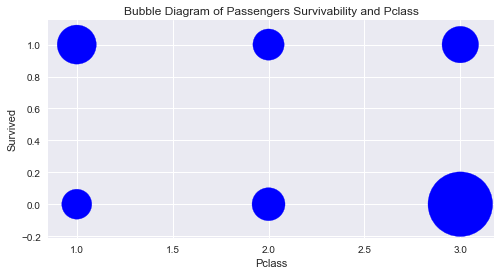

In [610]:
survived_percentage(titanic_df2,'Pclass')

The buble chart above shows the percentage of each combination of ticket class and survived variables compared to overall passengers.

Overall, since the lifeboats were limited and had less capacity than the number of passengers, first class passengers seems to get priority over lower classes ones. 

### 2. Sex vs Survived

Variable Sex is grouped into 2 classes as follow:

- 0 = male
- 1 = female


Survived:
- 0 = not survived 
- 1 = survived.   

In [598]:
groupedsex=titanic_df2.groupby(['Sex','Survived']).count()
listcol=['PassengerId','Pclass','Age','SibSp','Parch','Fare','Embarked','Ticket']
calldelcol(groupedsex,listcol)
nonsurvived = groupedsex.xs(0,level='Survived')
nonsurvived.columns=['NotSurvived']
survived = groupedsex.xs(1,level='Survived')
survived.columns=['Survived']

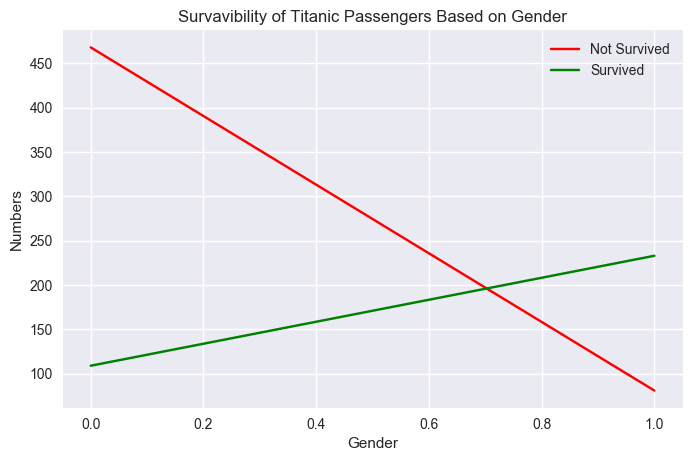

In [602]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=100)

axes.plot(nonsurvived, c='red',label = "Not Survived")
axes.plot(survived, c='green',label = "Survived")
axes.set_xlabel('Gender')
axes.set_ylabel('Numbers')
axes.set_title('Survavibility of Titanic Passengers Based on Gender')
axes.legend(loc=0)


plt.show()

The line chart above shows that male passengers were not so lucky that the number of survived ones were much lower than those who could not. On the contrary, female travellers were more likely to survived.

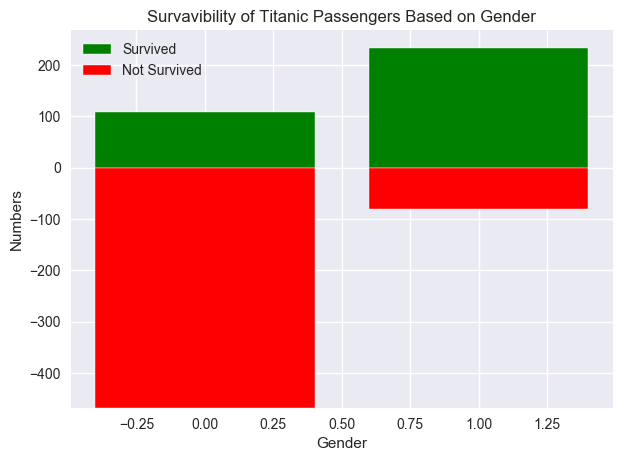

In [601]:
x = survived.index.values
ysurv = survived['Survived']
ynonsurv = nonsurvived['NotSurvived']

fig = plt.figure(figsize=(7, 5),dpi=100)
plt.bar(x, ysurv, facecolor='green', edgecolor='white',label = "Survived")
plt.bar(x, -ynonsurv, facecolor='red', edgecolor='white',label = "Not Survived")
plt.xlabel('Gender')
plt.ylabel('Numbers')
plt.title('Survavibility of Titanic Passengers Based on Gender')
plt.legend(loc=0)

plt.show()

The bar chart above conveys the same message as the previous chart. Male passengers unfortunately had small changes to survive the sinking of Titanic.

   Survived  Sex  PassengerId  Percentage
0         0    0          468   52.525253
1         1    0          109   12.233446
2         0    1           81    9.090909
3         1    1          233   26.150393


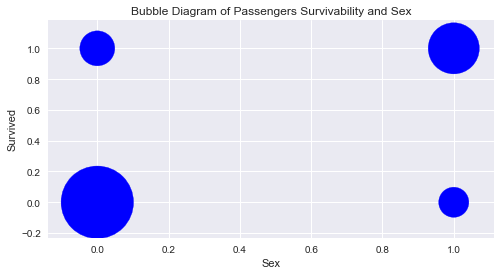

In [603]:
survived_percentage(titanic_df2,'Sex')

The buble chart above shows the percentage of each combination of sex and survived variables compared to overall passengers. We can see that the bigest group is male travellers who did not survive the accident.

Overall, this information is in line with the code of conduct when the priorities for lifeboats were given to woman and children. Quite possible that many of male passengers did not find seats in the lifeboats and perished in the ocean.

### 3. Age vs Survived

Even though Age as a whole doesn't have high correlation coefficient with Survived, we can deep dive into each group age to see if there is pattern for each group age.

Variable Age is grouped into 7 classes as follow:

- 0 = between 0 and 5 years old,
- 1 = between 5 and 15 years old,
- 2 = between 15 and 20 years old,
- 3 = between 20 and 35 years old,
- 4 = between 35 and 50 years old,
- 5 = between 50 and 65 years old,
- 6 = 65 years and older.


Survived:
- 0 = not survived 
- 1 = survived.       

In [604]:
groupedage=titanic_df2.groupby(['Age','Survived']).count()
listcol=['PassengerId','Pclass','Sex','SibSp','Parch','Fare','Embarked','Ticket']
calldelcol(groupedage,listcol)
nonsurvived = groupedage.xs(0,level='Survived')
nonsurvived.columns=['NotSurvived']
survived = groupedage.xs(1,level='Survived')
survived.columns=['Survived']


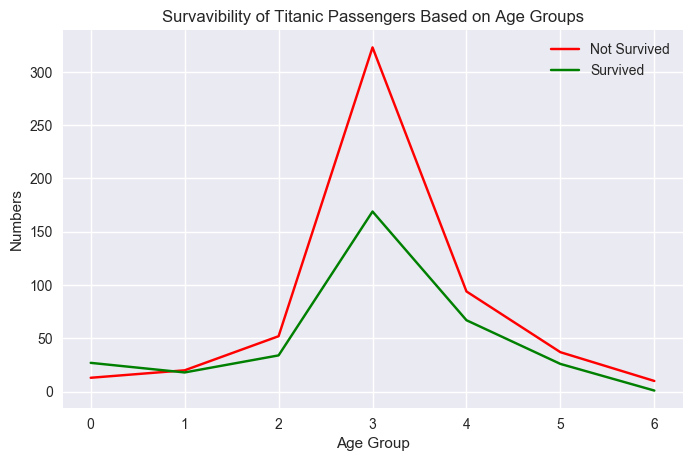

In [605]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=100)

axes.plot(nonsurvived, c='red',label = "Not Survived")
axes.plot(survived, c='green',label = "Survived")
axes.set_xlabel('Age Group')
axes.set_ylabel('Numbers')
axes.set_title('Survavibility of Titanic Passengers Based on Age Groups')
axes.legend(loc=0)


plt.show()


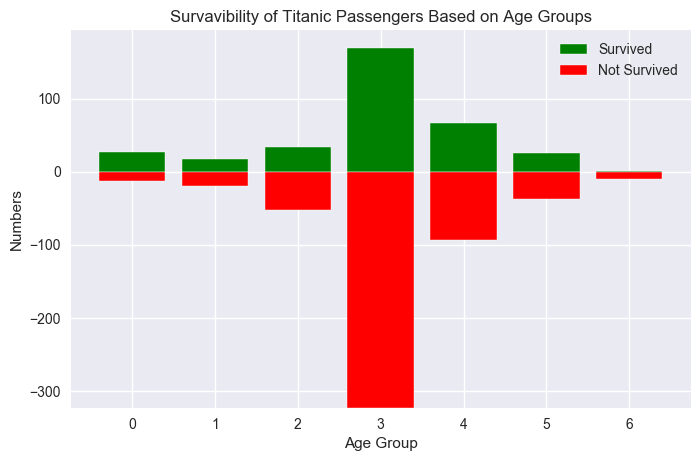

In [606]:
x = survived.index.values
ysurv = survived['Survived']
ynonsurv = nonsurvived['NotSurvived']

fig = plt.figure(figsize=(8, 5),dpi=100)
plt.bar(x, ysurv, facecolor='green', edgecolor='white',label = "Survived")
plt.bar(x, -ynonsurv, facecolor='red', edgecolor='white',label = "Not Survived")
plt.xlabel('Age Group')
plt.ylabel('Numbers')
plt.title('Survavibility of Titanic Passengers Based on Age Groups')
plt.legend(loc=0)

plt.show()


Both of the chart below show that the median age falls in group 3, which is between 25 - 30 years old. Unfortunately, this is also the group that suffered the highest casualties. Only group 0 (0 - 5 years old) had more survivors than fatalities. Again, this could be due to the evacuation priority was given to the children.

# Limitation

1. The data covers subset of total Titanic passengers. With sample data, there could be variability in the analysis result compared to overall population.
2. Matplotlib as a visualization tool is not very user friendly and requires some modification to the data structure itself to achieve intended visualizaton. 
3. Related to point 2, as it stands now the course has not yet touched visualization part. Therefore self exploration on the topic is required.

# Conclusion 

1. By looking at the Pearson coefficient, the two strongest dependent variables are Sex and Pclass. From the data we can see that in general, female passengers had better chance to survive. This is perhaps due to the facts that women and children were prioritised to be evacuated to lifeboats. The second variable is the Pclass or ticket class. For the passengers in the first class, they were twice more likely to survive. On the contrary, only around 24% passengers in third clas survived. 

2. The analysis was made by observing the charts and Pearson coefficient. Statistical tests need to be performed on the data to examine the significance of the dependent variables to the independent variable (Survived). Hence the result here is tentative.

3. One can use machine learning to build a model to predict the survivability of the passengers based on the various variables.predict the survivability


# Reference

1. Kaggle data source (https://www.kaggle.com/c/titanic/data)
2. Unseen Titanic (http://www.nationalgeographic.com/magazine/2012/04/titanic-shipwreck-revealed-complete-mosaic-images/)
3. Numpy manual (https://docs.scipy.org/doc/numpy/reference/)
4. Pandas manual (http://pandas.pydata.org/pandas-docs/version/0.15.1/)
5. Pearsson coefficient (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)